In [71]:
np.minimum(5,10)

5

In [85]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def calc_dist(func, points, bins, max_size):
    counts = np.zeros(bins)
    bin_width = max_size/bins
    print("Bin Width = "+str(bin_width))
    for i in range(1,points):
        xi  = random.random()
        #print("Random "+str(xi))
        x = func(xi)
        #print("Value "+str(x))
        index = np.minimum(np.floor((x/max_size)/bin_width), max_size/bin_width-1)
        #print("Value "+str(x)+" goes to index "+str(index))
        counts[int(index)] += 1
    percent_dist = counts/points
    prob_dist = percent_dist/bin_width/max_size
    
    plt.plot(prob_dist, "x")

Bin Width = 0.01


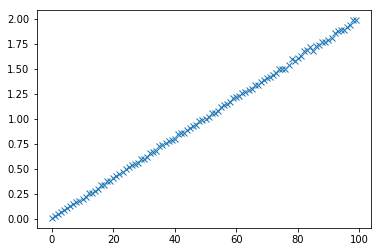

In [86]:
calc_dist(np.sqrt, 1000000, 100, 1)

Bin Width = 0.003


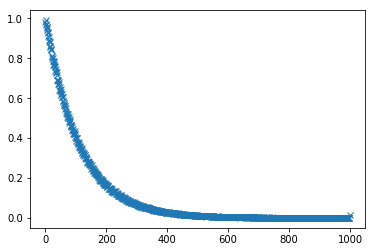

In [89]:
def exp_dist(x):
    return -np.log(1-x)
calc_dist(exp_dist, 1000000, 1000, 3)

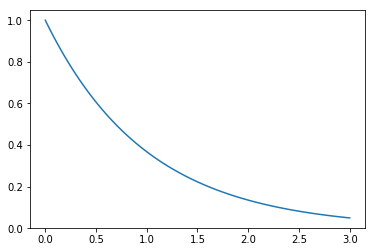

In [91]:
x = np.arange(0, 100)/33
plt.plot(x,np.exp(-x))